<a href="https://colab.research.google.com/github/HeHeHuang/DeepLearningNLP/blob/main/DeepLearning_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

## Charpter 1 Numpy & Nural Network


### NUMPY

#### Numpy dimension: vector & matirx


In [ ]:
import numpy as np

In [ ]:
import numpy as np
x = np.array([1,2,3])
x.shape



(3,)

In [ ]:
W = np.array([[1,2,3],[4,5,6]])
W.shape

(2, 3)

In [ ]:
W.ndim

2

In [ ]:
W2 = np.array([[1,2,3], [4,5]])
W2.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(2,)

#### Element-wise


In [ ]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])

In [ ]:
W + X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [ ]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

In [ ]:
X2 = np.array([[0,1],[3,4],[3,6]])
np.dot(W,X2)

array([[15, 27],
       [33, 60]])

#### Broadcast


In [ ]:
A = np.array([[1,2],[3,4]])
A * 10 

array([[10, 20],
       [30, 40]])

In [ ]:
A = np.array([[1,2],[3,4]])
B = np.array([1,2])  # become to [[1,2],[1,2]] first and then A * B
A * B

array([[1, 4],
       [3, 8]])

##### more example of broadcast


#### vector  dot product


> *  向量内积直观的表示为" 两个向量在多大程度上指向同一个方向"
*   矩阵乘积:
"左侧矩阵的行向量(水平方向) " 和"右侧矩阵的列向量(垂直方向) 的内积 



In [ ]:
A = np.array([1,2,3])
B = np.array([4,5,6])
np.dot(A,B)

32

In [ ]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.dot(A,B)

array([[19, 22],
       [43, 50]])

#### Numpy 100 exercises
[Numpy 100 exercises](https://github.com/rougier/numpy-100)

#### check shape of matrix

> 3X2 matrix * 2X4 matrix = 3X4 matrix






In [ ]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([[5,6,7,8],[6,7,8,9]])
np.dot(A,B)

array([[17, 20, 23, 26],
       [39, 46, 53, 60],
       [61, 72, 83, 94]])

### 神经网络 = 推理+ 学习

#### 神经网络的推理: 设定概念图


#### 例子
输入层2 隐藏层4 输出层3
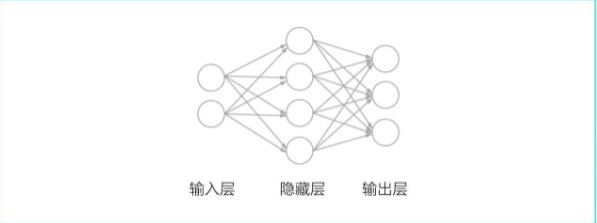


输入层 2维数据 权重 2X4 
隐藏层 1x4    权重: 4X3
输出层:3维数据



In [ ]:
def sigmoid(x):
  return 1/ (1+np.exp(-x))
x= np.random.randn(10,2) # mini-batch 10笔二维数据 组成了 一个mini -batch 一次性处理了.
W1=np.random.randn(2,4)
B1=np.random.randn(4)
W2=np.random.randn(4,3)
B2=np.random.randn(3)
h =np.dot(x,W1)+B1
print(h)
a = sigmoid(h)
s =np.dot(a,W2)+B2
s

[[-3.26831395  1.8545134   0.80020323  0.59460428]
 [ 2.54218948 -0.98607205 -0.03152353 -2.07267584]
 [-4.19232522  2.31297785  0.87941593  1.18616416]
 [ 2.53020823 -0.96456577 -0.15294276 -1.67864501]
 [-0.24159801  0.34703522  0.58573825 -1.48513525]
 [ 1.43916043 -0.46884398  0.29955696 -2.11281276]
 [ 1.11675921 -0.33511879  0.53366392 -2.55788778]
 [ 2.5751108  -0.907584   -0.78045769  0.26048729]
 [ 2.56642679 -0.99297116 -0.07394048 -1.96090886]
 [-3.12613596  1.84217533  0.33002002  1.94871151]]


array([[ 1.78276409,  0.22129988,  0.89431358],
       [ 1.72083944, -0.79137243,  0.14171526],
       [ 1.83552054,  0.08874823,  0.89169851],
       [ 1.6953986 , -0.88521302,  0.11755   ],
       [ 1.76571718,  0.13424761,  0.60782623],
       [ 1.80865048, -0.49437631,  0.26563628],
       [ 1.84928357, -0.28931269,  0.34780512],
       [ 1.59351502, -1.64156563, -0.02401488],
       [ 1.7106329 , -0.82110903,  0.13307176],
       [ 1.69402873, -0.23469137,  0.79963171]])

#### Python中  层的类化 & 正向传播

> *  Affine 层: WX + b
* Sigmoid 层: 激活函数
* forward():  params 实例变量

 




In [ ]:
class Sigmoid:
 def __init__ (self):
  self.params = []
 def forward(self,x):
  return 1 / (1+np.exp(-x))

In [ ]:
class Affine:
  def __init__(self,W,b):
    self.params = [W,b]
  
  def forward(self,x):
    W,b = self.params
    out = np.dot(x,W) + b
    return out 

在这个类的初始化方法中，首先对权重进行初始化，生成3个层。然后，将要学习的权重参数一起保存在params列表中。这里，因为各个层的实例变量params中都保存了学习参数，所以只需要将它们拼接起来即可。这样一来，TwoLayerNet的params变量中就保存了所有的学习参数。像这样，通过将参数整理到一个列表中，可以很轻松地进行参数的更新和保存。

In [ ]:
class TwoLayerNet:
  def __init__(self,input_size,hidden_size,output_size):
    I,H,O = input_size,hidden_size,output_size
    W1 = np.random.randn(I,H)
    b1 = np.random.randn(H)
    W2 = np.random.randn(H,O)    #
    b2 = np.random.randn(O)
    
  # 类实例存入list
    self.layers = [
                   Affine(W1,b1),
                   Sigmoid(),
                   Affine(W2,b2)
                   ]
    self.params = []
    for layer in self.layers:
      self.params += layer.params
    
  def predict(self,x):
    for layer in self.layers:
      x = layer.forward(x) 
    return x 
  

In [ ]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)
s  # 10X3


array([[-1.29170745,  2.81519404, -2.98217872],
       [-1.52099523,  2.45911373, -2.5306044 ],
       [-1.19685801,  2.91779655, -2.49370409],
       [-1.32811945,  2.72538488, -2.76048189],
       [-1.77059304,  2.35516719, -1.97550776],
       [-1.27441759,  2.8086111 , -2.80651138],
       [-1.66320102,  2.28687606, -2.143104  ],
       [-1.72349242,  2.25905541, -2.04043855],
       [-1.76337306,  2.30763863, -1.97678084],
       [-1.45618276,  2.55476842, -2.79243348]])

#### 神经网络的学习: 找出最优的参数


 Loss 是一个指标=>衡量学习阶段的某个时间点神经网络的性能--> loss function


> Cross entropy error-> loss function -> 多类别分类 (各类别的概率+监督标签)

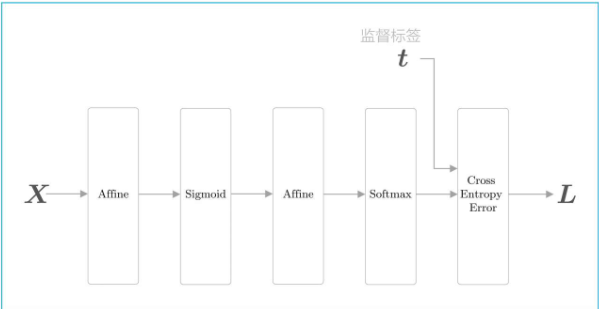

监督标签以 one-hot 向量的形式表示 比如 t =(0,0,1) 1 为正解

* 损失
* 梯度
* 误差反向传播
* 链式法则



反向传播： 复合函数的导数可以由他们各自的导数来求复合导数的导数
假设L是最终的结果。 那么， 目标就是求L 关于每个变量的导数

#### 计算图
* 变量
    * 单变量
    * 多变量
* 节点
    * 乘法节点
    * 加法节点
    * 分支节点（复制节点）两个分叉 复制两份
    * repeat 节点：  复制了N份
    * Sum 节点
    * Mulmul 节点 （矩阵乘积）
* 箭头



反向传播中流动的导数的值是根据上游传来的导数 和 各个运算节点的局部导数之积 求得的

### 疑问? L(Z) 我们追求的是他的最小值, 所以当更新 parameter的时候 他是确定的? 


#### repeat 节点


In [ ]:
import numpy as np 
D,N = 8, 7 
x= np.random.randn(1,D)
x

array([[-1.52024334,  1.12076087, -0.43960726, -0.63735499,  2.00224635,
         0.45218   , -0.24525707, -1.08173484]])

In [ ]:
x.shape

(1, 8)

In [ ]:
y = np.repeat(x, N , axis =0)
y

array([[-1.52024334,  1.12076087, -0.43960726, -0.63735499,  2.00224635,
         0.45218   , -0.24525707, -1.08173484],
       [-1.52024334,  1.12076087, -0.43960726, -0.63735499,  2.00224635,
         0.45218   , -0.24525707, -1.08173484],
       [-1.52024334,  1.12076087, -0.43960726, -0.63735499,  2.00224635,
         0.45218   , -0.24525707, -1.08173484],
       [-1.52024334,  1.12076087, -0.43960726, -0.63735499,  2.00224635,
         0.45218   , -0.24525707, -1.08173484],
       [-1.52024334,  1.12076087, -0.43960726, -0.63735499,  2.00224635,
         0.45218   , -0.24525707, -1.08173484],
       [-1.52024334,  1.12076087, -0.43960726, -0.63735499,  2.00224635,
         0.45218   , -0.24525707, -1.08173484],
       [-1.52024334,  1.12076087, -0.43960726, -0.63735499,  2.00224635,
         0.45218   , -0.24525707, -1.08173484]])

In [ ]:
y1 = np.repeat(x, N , axis =1)
y1

array([[-1.52024334, -1.52024334, -1.52024334, -1.52024334, -1.52024334,
        -1.52024334, -1.52024334,  1.12076087,  1.12076087,  1.12076087,
         1.12076087,  1.12076087,  1.12076087,  1.12076087, -0.43960726,
        -0.43960726, -0.43960726, -0.43960726, -0.43960726, -0.43960726,
        -0.43960726, -0.63735499, -0.63735499, -0.63735499, -0.63735499,
        -0.63735499, -0.63735499, -0.63735499,  2.00224635,  2.00224635,
         2.00224635,  2.00224635,  2.00224635,  2.00224635,  2.00224635,
         0.45218   ,  0.45218   ,  0.45218   ,  0.45218   ,  0.45218   ,
         0.45218   ,  0.45218   , -0.24525707, -0.24525707, -0.24525707,
        -0.24525707, -0.24525707, -0.24525707, -0.24525707, -1.08173484,
        -1.08173484, -1.08173484, -1.08173484, -1.08173484, -1.08173484,
        -1.08173484]])

In [ ]:
dy = np.random.randn(N,D)
dy


array([[ 0.87340922, -0.10480915,  0.92577066,  1.59509251, -0.79398424,
         0.47781619,  0.71672852,  0.15334379],
       [-0.1911213 ,  0.12732101,  1.47604204, -1.04710059,  1.81883732,
         0.35310412,  0.58303388,  0.14718359],
       [-0.57765993,  0.54764417, -1.39217422,  0.42923251,  0.70364897,
         0.63827304, -0.73335994,  0.13243546],
       [ 0.71740553,  0.54996188, -1.50063431, -0.31682714, -0.44215425,
         1.29228662, -0.80524447,  0.1629665 ],
       [ 0.3227421 , -0.28149178,  1.89192727,  0.94844882, -0.59856519,
        -0.20543484, -0.4521932 ,  0.72327876],
       [ 0.11406736,  1.0064567 ,  0.5497729 ,  1.60513292,  0.90977248,
        -0.59960321,  0.2512177 ,  1.02000203],
       [ 0.7704773 , -1.59201597, -0.08697192, -1.14861119, -0.54969505,
         1.46795555,  0.46856497,  0.01432146]])

In [ ]:
dx = np.sum(dy,axis = 0 , keepdims = True)
dx

array([[2.02932029, 0.25306685, 1.86373241, 2.06536783, 1.04786004,
        3.42439746, 0.02874747, 2.35353159]])

In [ ]:
dx = np.sum(dy,axis = 0 , keepdims = False)
dx.shape

(8,)

### 什么是优化， 为什么更新权重可以影响 loss


了解如何通过改变权重来改变网络的输出后，我们接下来要知道如何最小化损失。改变权重就会改变输出，而改变输出就会改变损失——因为损失就是一个预测 (Y_pred) 值的函数，而这个值本质上就是网络的输出。所以，我们可以得出的结论是，改变权重最终会让损失也发生改变。

我们已经展示了权重和最终的损失之间的关系，但是目前为止我们还仅仅探讨了改变。改变可以是增加的意思，也可以是减少的意思，而在这里我们需要的是减少损失。所以，我们需要探索以这种方式来改变权重究竟如何能够能让损失减少。这一过程就叫做优化。

从数学的角度来看，我们可以通过使用偏导数（Partial Derivatives）来实现这个过程。偏导数能够让我们理解两个数学表达式如何相互影响。让我们先假设 X 和 Y，它们之间存在某些任意的数学关系，如果我们能够得到 X 对 Y 的偏导数，我们就能够知道 X 的改变如何影响 Y。如果偏导数为正，就意味着 Y 会随着 X 的增大而增大；如果为负，则意味着 Y 随 X 的增大而减小。

如此一来，我们需要得到神经网络中的每个权重对损失的偏导数。在某个特定案例中，如果权重的偏导数为正，那我们就减小权重从而减小损失；如果为负，我们就增大权重以减小损失——毕竟优化最终的目标就是：减小损失！

数学公式、可视化图齐齐上阵，神经网络如何一步步走向最优化「看得见」！
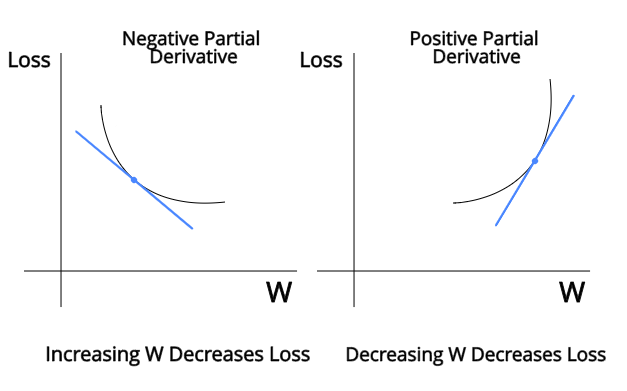

#### matmul: Matrix multiple


In [ ]:
class MatMul:
  def __init__(self,W):
    self.params = [W]
    self.grads = [np.zeros_like(W)]  #Return an array of zeros with the same shape and type as a given array.
    self.x = None 
  
  def forward(self,x):
    W, = self.params
    out = np.dot(x,w)
    self.x = x
    return out
  
  def backward(self,dout):  # 求更新的 W  
    W, = self.params
    dx = np.dot(dout, W.T)    
    dw = np.dot(self.x.T, dout)
    self.grads[0][...] = dw
    return dx




#### Affine 层


In [ ]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

#### Sigmoid 层


In [ ]:
class Sigmoid:
  def __init__ (self):
  self.params,
  self.grads = [],[]

###### softmax

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

###### Cross entropy error 

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [ ]:
!pip install dataset

In [ ]:
!pip dataset

     |████████████████████████████████| 210 kB 15.0 MB/s 
     |████████████████████████████████| 78 kB 8.4 MB/s 


#### SoftmaxWithLoss

In [ ]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmaxの出力
        self.t = None  # 教師ラベル

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 教師ラベルがone-hotベクトルの場合、正解のインデックスに変換
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

### 使用神经网络解决问题


In [ ]:
import sys
sys.path.append('..')
from dataset import spiral


ImportError: ignored

In [ ]:
# coding: utf-8
import numpy as np


def load_data(seed=1984):
    np.random.seed(seed)
    N = 100  # クラスごとのサンプル数
    DIM = 2  # 二维数据
    CLS_NUM = 3  # t 三个类别

    x = np.zeros((N*CLS_NUM, DIM))
    t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)

    for j in range(CLS_NUM):
        for i in range(N):#N*j, N*(j+1)):
            rate = i / N
            radius = 1.0*rate
            theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

            ix = N*j + i
            x[ix] = np.array([radius*np.sin(theta),
                              radius*np.cos(theta)]).flatten()
            t[ix, j] = 1

    return x, t


In [ ]:
import matplotlib.pyplot as plt
x,t = load_data()
print('x',x.shape)
print('t',t.shape)

x (300, 2)
t (300, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


In [ ]:
x

In [ ]:
t

##### 隐藏层神经网络


## Charpter 2 单词的分布式表示 (before deep learning) 

### 自然语言处理



> 目标: 让计算机理解人说的话,进而完成对我们有帮助的事情


>所以理解单词含义就很重要. 单词是含义的最小单位






### 基于同义词词典的方法


> 用同义词词典 把相同含义或者类似含义的单词归为一组


> 上下位关系,整体部分关系--> 近义词集合, 并用**图**表示各个单词的关系,利用'单词网络'教会计算机单词之间的相关性. 


> 问题& 为什么不用? 时代在变化, 人力成本高,无法表示单词的微妙差异







In [ ]:
#WordNet


### 基于计数的方法


> 语料库(corpus): 大量的文本数据.


> 目标: 从这些富有实践知识的语料库中,自动且高效的提取本质


> 或许有额外的操作, 并不是单纯一个文本: eg: 标记词性,采用**树结构**等数据形式








#### 文本预处理 将文本编程语料库



> 分词-->单词ID列表



In [ ]:
text = 'You say goodbye and I say hello.'
text = text.lower()
text = text.replace('.',' .')
print(text)
words = text.split(' ')
words

you say goodbye and i say hello .


['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [ ]:
# 用字典来创建单词id和单词的对应表
word_to_id = {}
id_to_word = {}
for word in words: 
  if word not in word_to_id:
    new_id = len(word_to_id)
    word_to_id[word] = new_id 
    id_to_word[new_id] = word

In [ ]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [ ]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [ ]:
#单词ID列表

corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)   #numpy 数组
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [ ]:
def preprocess(text):
  text = text.lower()
  text = text.replace('.',' .')
  words = text.split(' ')
  word_to_id = {}
  id_to_word = {}
  for word in words:
    if word not in word_to_id:
      new_id = len(word_to_id)
      word_to_id[word] = new_id
      id_to_word[new_id] = word
  
  corpus = [word_to_id[w] for w in words]
  corpus = np.array(corpus)
  return corpus, word_to_id,id_to_word


In [ ]:
test = 'You are best and i am best Too'
corpus,word_to_id,id_to_word = preprocess(test)
corpus,word_to_id,id_to_word

(array([0, 1, 2, 3, 4, 5, 2, 6]),
 {'am': 5, 'and': 3, 'are': 1, 'best': 2, 'i': 4, 'too': 6, 'you': 0},
 {0: 'you', 1: 'are', 2: 'best', 3: 'and', 4: 'i', 5: 'am', 6: 'too'})

In [ ]:
len(corpus)

8

#### 单词的分布式表示


> 颜色的三维向量表示   (R,G,B) = (201,23,30) 可以通过向量来判断颜色的相似度


>单词的分布式表示: 将单词表示为固定长度的向量. (密集向量) 向量的各个元素(大多数)是由非0实数来表示的.  eg: [0.22,-0.34,0.83]





#### 构建分布式表示的前提: 分布式假设(distributional hypothesis) 


>单词本身没有含义, 单词的含义由它所在的上下文(语境)形成的


> window size: 上下文的大小, 周围单词有多少个






#### 用共现矩阵 表示


> 基于计数的方法 = 基于统计的方法: 关注某个单词的情况下,对它的周围出现了多少次什么单词进行计数, 然后再汇总.


> co-occurence matrix: 用向量表示了单词





In [ ]:
for idx,word_id in enumerate(corpus):
  print(idx)
  print('word id:' ,word_id)

0
word id: 0
1
word id: 1
2
word id: 2
3
word id: 3
4
word id: 4
5
word id: 5
6
word id: 2
7
word id: 6


把corpus 中的单词一字排开 不重复的
看关注词的上下文 出现的单词频数

In [ ]:
# create co-occurence matrix
def create_co_matrix(corpus,vocab_size,window_size=1):   # vocab_size= 7 , len(corpus) = 8 
  corpus_size = len(corpus)
  co_matrix = np.zeros((vocab_size,vocab_size),dtype =np.int32)

  for idx,word_id in enumerate(corpus):
    for i in range(1,window_size + 1):
      left_idx = idx -i 
      right_idx = idx +i
      if left_idx >= 0:
        left_word_id = corpus[left_idx]
        co_matrix[word_id,left_word_id] += 1

      if right_idx < corpus_size:
        right_word_id = corpus[right_idx]
        co_matrix[word_id,right_word_id] += 1

  return co_matrix


In [ ]:
seasons = ['Spring', 'Spring', 'Fall', 'Winter']
list(enumerate(seasons))

[(0, 'Spring'), (1, 'Spring'), (2, 'Fall'), (3, 'Winter')]

In [ ]:
co_matrix[1,1]

0

In [ ]:
co_matrix=create_co_matrix(corpus,7,1)
co_matrix

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

In [ ]:
co_matrix.shape[0]
co_matrix.shape[1]

7

#### 单词的相似度: 余弦相似度


> 两个向量多大程度指向同一个方向 取值范围[-1,1]





In [ ]:
def cos_similarity(x,y):
  nx = x / np.sqrt(np.sum(x**2))
  ny = y / np.sqrt(np.sum(y**2))
  return np.dot(nx,ny)

防止分母为0,引入微小数



In [ ]:
def cos_similarity(x,y,eps = 1e-8):
  nx = x / np.sqrt(np.sum(x**2) +eps)
  ny = y / np.sqrt(np.sum(y**2) +eps)
  return np.dot(nx,ny)

In [ ]:
text = 'You say goodbye and i say hello.'
corpus,word_to_id,id_to_word = preprocess(text)
vocab_side = len(word_to_id)
print(vocab_side,corpus,word_to_id,id_to_word )
C = create_co_matrix(corpus,vocab_side,1)
c0 = C[word_to_id['you']]
c1 = C[word_to_id['i']]
print(cos_similarity(c0,c1))


7 [0 1 2 3 4 1 5 6] {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6} {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
0.7071067758832467


#### 相似单词的排序
语料库中最相似的几个单词

In [ ]:
def most_similar(query,word_to_id,id_to_word,word_matrix,top=5):
  if query not in word_to_id:
    print ('%s is not found'  % query)
    return print ('\n[query]' + query)
  query_id = word_to_id[query]
  query_vec = word_matrix[query_id]

  vocab_side = len(id_to_word)
  similarity = np.zeros(vocab_side)
  for i in range(vocab_side):
    similarity[i] = cos_similarity(word_matrix[i],query_vec)

  #基于余弦相似度, 按降序输出值
  count = 0 
  for i in (-1 * similarity).argsort():
    if  id_to_word[i] == query:
      continue
    print ('%s:%s' %(id_to_word[i],similarity[i]))

    count +=1
    if count >= top:
      return
 

In [ ]:
most_similar('you',word_to_id,id_to_word,C,top =5)

goodbye:0.7071067758832467
i:0.7071067758832467
hello:0.7071067758832467
say:0.0
and:0.0


### 基于计数的方法改进


> 改进共现矩阵: 单纯的词频 不足以表现相似度, 比如 the 这个词,出现了很多次. 那么它与其他数的共现次数就会很大. 




#### PMI: pointwise mutual information

P(x,y): 表示x,y 同时发生的概率, pmi越高,相关性越强




PPMI: PMI也有一个问题, 当两个单词的共现次数为0时, log2 **0**  = 无穷小


> PPMI 的功能时: 当PMI 为负数时, 将其视为 0 



In [ ]:
def ppmi(C,verbose = False, eps =1e-8):
  M =np.zeros_like(C,dtype = np.float32)
  N = np.sum(C)
  S = np.sum(C,axis=0)
  total = C.shape[0] * C.shape[1]
  cnt = 0
  for i in range(C.shape[0]):
    for j in range(C.shape[1]):
      pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)  #pmi
      M[i, j] = max(0, pmi)    # ppmi
      if verbose:
        cnt += 1
        if cnt % (total//100+1) == 0:
          print('%.1f%% done' % (100*cnt/total))
  return M

In [ ]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)
np.set_printoptions(precision=3) # 有效位数为3位
print('covariance matrix')
print(C)
print('-'*50)
print('PPMI')
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


#### 降维: 
为什么要降维?


1.   共现矩阵中, 随着语料库的词汇量增加,各个单词向量的维数也会增加. 
2.   共现矩阵中, 有很多元素是0, 这些元素重要性很低



> 在稀疏向量中找出重要的轴, 用更少的维度对其重新表示.




##### SVD降维: singular value Decomposition

#### 基于计数的方法的总结: 


> 从语料库自动提取单词含义,将其表示为向量,创建单词的共现矩阵,并将其转化为PPMI矩阵,在基于SVD降维以提高稳健性, 最后获得了每个单词的分布式表示. 这里的假设是: 含义或者语法相近的单词在向量空间上位置相近.



### 基于推理的方法( word2vec)

基于计数的方法是一次性处理全部学习数据,反之,基于推理的方法使用部分学习数据逐步学习. 都基于单词的含义由上下文构成这个假设


> 推理: 当给出周围的单词(上下文)时,预测 关注词会出现什么单词.



> 给上下文-->通过模型(神经网络: 用语料库来学习)---> 输出每个单词的出现概率  --> 得到单词的分布式表示





#### 神经网络的单词的处理方法:
将单词转化为固定长度的向量. one-hot (一个元素时1, 其他都是0)
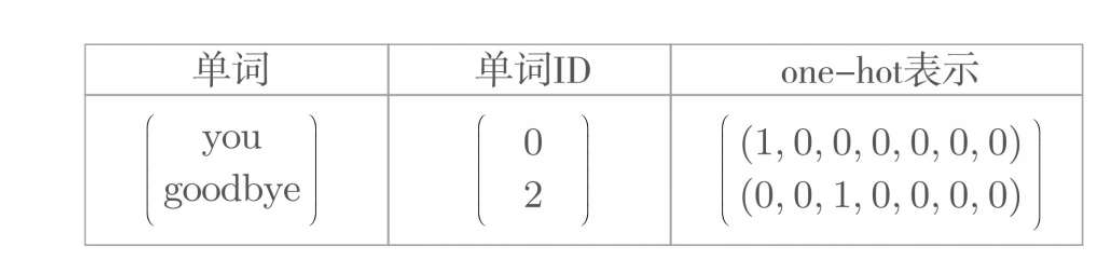

7个单词对应着7个输入层
假设有三个隐藏层
W 就为 7x3的矩阵  (matmul) 省略偏置 


有了输入层以后, word2vec 就相当于一个神经网络模型.

## Word2vec

### CBOW continuous bag of words


> cbow模型是根据上下文预测目标词的神经网络
> cbow的上下文只有两个单词,所以有两个输入层
> 从输入层到中间层的变化有全连接层完成, 这个全连接层的W权重就是单词的分布式,通过反复学习,不断更新各个单词的分布式.
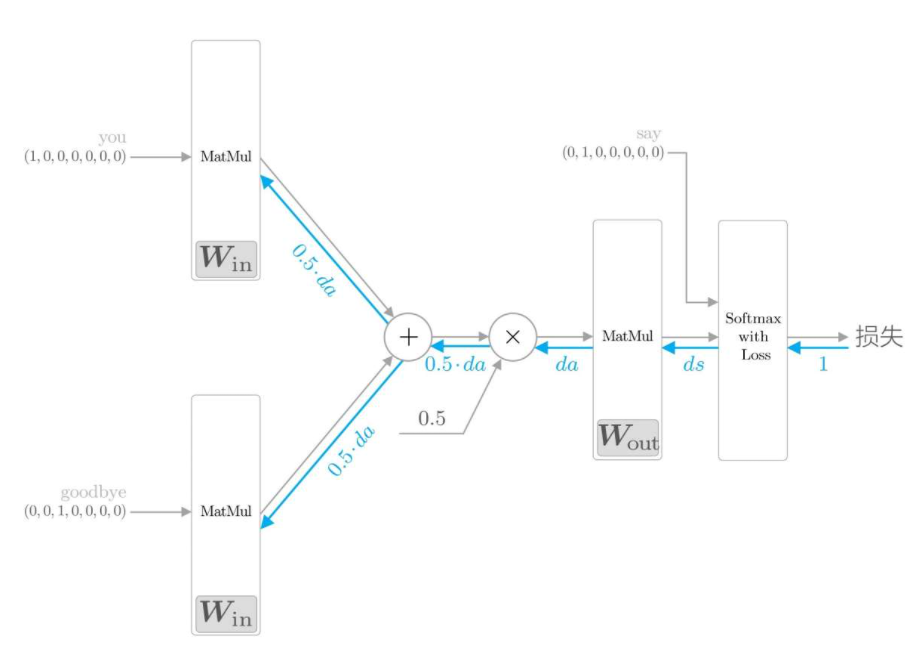


In [ ]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

In [ ]:
c2 =np.array([1,0,0,0,0,0,0])
print(c2.shape) # 一维数组

#样本上下文
c0 =np.array([[1,0,0,0,0,0,0]])
print(c0.shape) # 二维数组

(7,)
(1, 7)


#### CBOW 模型的推理 求出得分的过程

In [ ]:
c2 =np.array([1,0,0,0,0,0,0])
c2.shape # 一维数组

#样本上下文
c0 =np.array([[1,0,0,0,0,0,0]])
c0.shape # 二维数组
c1 =np.array([[0,0,1,0,0,0,0]])

#权重的初始值
W_in= np.random.randn(7,3)
W_out = np.random.randn(3,7)

# 生成层
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer0 = MatMul(W_out)

#正向传播
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer0.forward(h)
s


array([[-1.82737149,  0.32856919,  0.45996611, -1.40133485, -1.71717601,
         2.96869583, -0.9784055 ]])

#### CBOW 模型的学习
> CBOW模型只是学习语料库中单词的出现模式,如果语料库不一样,学习到的单词的分布式表示也不一样

##### 学习数据的准备
> 输入: 上下文 target: 上下文包围在中间的单词(目标词) 
>目标: 当向神经网络输入上下文时,使目标词出现的概率高


In [ ]:
text ='You say goodbye and I say hello.'
corpus, word_to_id,id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


###### create content and target 

In [ ]:
# create content and target 
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size]
    contexts = []

    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size + 1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)

    return np.array(contexts), np.array(target)

######  convert word id to one hot

In [ ]:
# convert word id to one hot
def convert_one_hot(corpus, vocab_size):
    N = corpus.shape[0]

    if corpus.ndim == 1:
        one_hot = np.zeros((N, vocab_size), dtype=np.int32)
        for idx, word_id in enumerate(corpus):
            one_hot[idx, word_id] = 1

    elif corpus.ndim == 2:
        C = corpus.shape[1]
        one_hot = np.zeros((N, C, vocab_size), dtype=np.int32)
        for idx_0, word_ids in enumerate(corpus):
            for idx_1, word_id in enumerate(word_ids):
                one_hot[idx_0, idx_1, word_id] = 1

    return one_hot


In [ ]:
contexts, target = create_contexts_target(corpus,window_size=1)
vocab_size = len(word_to_id)
target = convert_one_hot(target,vocab_size)
contexts = convert_one_hot(contexts,vocab_size)
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)

##### Simple CBOW 模型的实现


In [ ]:
W_in = 0.01 * np.random.randn(5, 6).astype('f')
W_in

array([[-0.00353308, -0.00416555, -0.01046171,  0.01070634,  0.00608121,
         0.01644649],
       [ 0.00318731, -0.00035069,  0.00928434,  0.00993016,  0.00580308,
        -0.01137446],
       [-0.00042086, -0.00555464,  0.01732996,  0.01428477, -0.00934618,
        -0.00402116],
       [ 0.00179994,  0.00794101, -0.00187573, -0.00923088, -0.01845981,
         0.01434825],
       [ 0.00304508,  0.00105705, -0.00128674, -0.00280351,  0.01491726,
        -0.00555424]], dtype=float32)

In [ ]:
# import Matmul, Softmax with Loss

class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 初始化权重
        W_in = 0.01 * np.random.randn(V, H).astype('f')   #将使用32位浮点型
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 生成层
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 将所有权重和梯度整理到列表中
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 将单词的分布式表示设置为成员变量
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

##### 学习实现


In [ ]:
# clip_grads
def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate

In [ ]:
import numpy
import time
import matplotlib.pyplot as plt

class Trainer:
    def __init__(self, model, optimizer):
        self.model = model
        self.optimizer = optimizer
        self.loss_list = []
        self.eval_interval = None
        self.current_epoch = 0

    def fit(self, x, t, max_epoch=10, batch_size=32, max_grad=None, eval_interval=20):
        data_size = len(x)
        max_iters = data_size // batch_size
        self.eval_interval = eval_interval
        model, optimizer = self.model, self.optimizer
        total_loss = 0
        loss_count = 0

        start_time = time.time()
        for epoch in range(max_epoch):
            # シャッフル
            idx = numpy.random.permutation(numpy.arange(data_size))
            x = x[idx]
            t = t[idx]

            for iters in range(max_iters):
                batch_x = x[iters*batch_size:(iters+1)*batch_size]
                batch_t = t[iters*batch_size:(iters+1)*batch_size]

                # 勾配を求め、パラメータを更新
                loss = model.forward(batch_x, batch_t)
                model.backward()
                params, grads = remove_duplicate(model.params, model.grads)  # 共有された重みを1つに集約
                if max_grad is not None:
                    clip_grads(grads, max_grad)
                optimizer.update(params, grads)
                total_loss += loss
                loss_count += 1

                # 評価
                if (eval_interval is not None) and (iters % eval_interval) == 0:
                    avg_loss = total_loss / loss_count
                    elapsed_time = time.time() - start_time
                    print('| epoch %d |  iter %d / %d | time %d[s] | loss %.2f'
                          % (self.current_epoch + 1, iters + 1, max_iters, elapsed_time, avg_loss))
                    self.loss_list.append(float(avg_loss))
                    total_loss, loss_count = 0, 0

            self.current_epoch += 1

    def plot(self, ylim=None):
        x = numpy.arange(len(self.loss_list))
        if ylim is not None:
            plt.ylim(*ylim)
        plt.plot(x, self.loss_list, label='train')
        plt.xlabel('iterations (x' + str(self.eval_interval) + ')')
        plt.ylabel('loss')
        plt.show()

In [ ]:
class Adam:
    '''
    Adam (http://arxiv.org/abs/1412.6980v8)
    '''
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = [], []
            for param in params:
                self.m.append(np.zeros_like(param))
                self.v.append(np.zeros_like(param))
        
        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

        for i in range(len(params)):
            self.m[i] += (1 - self.beta1) * (grads[i] - self.m[i])
            self.v[i] += (1 - self.beta2) * (grads[i]**2 - self.v[i])
            
            params[i] -= lr_t * self.m[i] / (np.sqrt(self.v[i]) + 1e-7)

###### Preprocess 

In [ ]:
def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [ ]:
 
#from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
print('vocab_size' ,vocab_size)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
print('target:' ,target)
contexts = convert_one_hot(contexts, vocab_size)
print('contexts:', contexts)
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])


vocab_size 7
target: [[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]
contexts: [[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]]


NameError: ignored

#### 从概率的角度看CBOW

给定 目标词上下文, 目标词出现的概率
wt 发生, 这一事件是正确解, 
CBOW 的损失函数


### Skip-gram 模型:


>根据目标词去推导周围的词

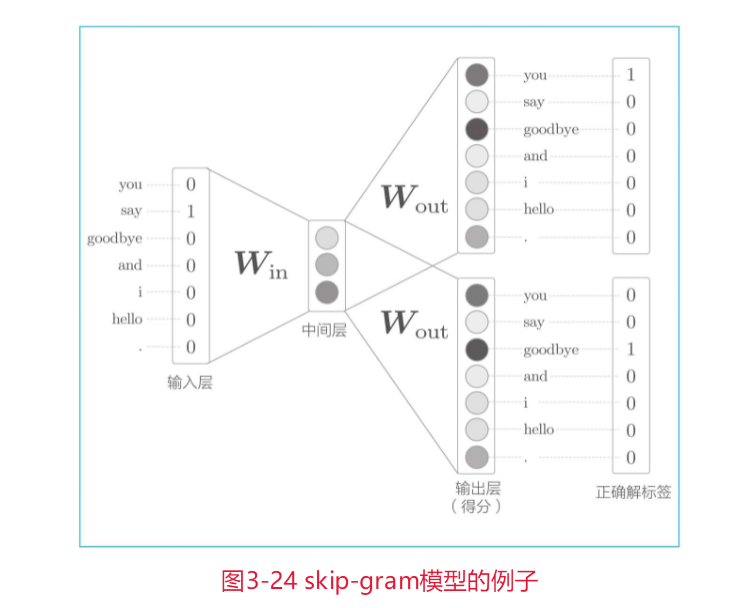


#### CBOW 与 Skip-gram 两者对比:
我们应该使用CBOW模型和skip-gram模型中的哪一个呢？答案应该是skip-gram模型。这是因为，从单词的分布式表示的准确度来看，在大多数情况下，skip-grm模型的结果更好。特别是随着语料库规模的增大，在低频词和类推问题的性能方面，skip-gram模型往往会有更好的表现（单词的分布式表示的评价方法会在4.4.2节说明）。此外，就学习速度而言， CBOW模型比skip-gram模型要快。这是因为skip-gram模型需要根据上下文数量计算相应个数的损失，计算成本变大。

### 基于计数与基于推理的对比
到目前为止，我们已经了解了基于计数的方法和基于推理的方法（特别是word2vec）。两种方法在学习机制上存在显著差异：基于计数的方法通过对整个语料库的统计数据进行一次学习来获得单词的分布式表示，而基于推理的方法则反复观察语料库的一部分数据进行学习（mini-batch学习）。这里，我们就其他方面来对比一下这两种方法。首先，我们考虑需要向词汇表添加新词并更新单词的分布式表示的场景。此时，基于计数的方法需要从头开始计算。即便是想稍微修改一下单词的分布式表示，也需要重新完成生成共现矩阵、进行SVD等一系列操作。相反，基于推理的方法（word2vec）允许参数的增量学习。具体来说，可以将之前学习到的权重作为下一次学习的初始值，在不损失之前学习到的经验的情况下，高效地更新单词的分布式表示。在这方面，基于推理的方法（word2vec）具有优势。

其次，两种方法得到的单词的分布式表示的性质和准确度有什么差异呢？就分布式表示的性质而言，基于计数的方法主要是编码单词的相似性，而word2vec（特别是skip-gram模型）除了单词的相似性以外，还能理解更复杂的单词之间的模式。关于这一点，word2vec因能解开“king-man+woman=queen”这样的类推问题而知名（关于类推问题，我们将在4.4.2节说明）。这里有一个常见的误解，那就是基于推理的方法在准确度方面优于基于计数的方法。实际上，有研究表明，就单词相似性的定量评价而言，基于推理的方法和基于计数的方法难分上下[25]

### GloVe方法
融合了基于推理的方法和基于计数的方法。该方法的思想是，将整个语料库的统计数据的信息纳入损失函数，进行mini-batch学习（具体请参考论文[27]）。据此，这两个方法论成功地被融合在了一起。

## Word2Vec 的高速化


> 对 Word2Vec 从两方面进行改进:


1.   引入 Embedding 层
2.   引入 Negative Sampling 的新损失函数





## RNN

## Gated RNN


## 基于RNN生成文本

## Attention
